In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import scipy
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import sys
base_dir = '/home2/ebrahim/neural_seq_decoder/' 
sys.path.append(f"{base_dir}/scripts/")
from load_data import store_data_to_pandas
from copy import deepcopy

This notebook saves smoothed neural data from and block + session information 
for running a regression between brain regions.

In [6]:
load_data_from_pickle = False # if true, load pre-existing pandas data

In [7]:
if load_data_from_pickle:
    
    all_sessions = pd.read_pickle(f"/data/LLMs/willet/all_sessions_pd.pkl")  
      
else:

    session_pd_store = []
    counter = 0

    for file in os.listdir(f"{base_dir}sentences/"):
        
        print("loading session data")
        session_dict = scipy.io.loadmat(f'{base_dir}sentences/{file}')
        session_name = file.split('_')[0].replace('t12.2022.', '')

        session_pd = store_data_to_pandas(session_dict, session_name=session_name)
        
        session_pd_store.append(session_pd)
        
    all_sessions = pd.concat(session_pd_store)
    all_sessions.to_pickle('/data/LLMs/willet/all_sessions_pd.pkl')
    

loading session data


ValueError: All arrays must be of the same length

In [6]:
all_sessions.shape

(5942443, 519)

In [7]:
all_sessions = all_sessions.loc[all_sessions.trialState!=3]

In [8]:
all_sessions.shape

(5472344, 519)

In [9]:
5942443 - 5472344

470099

In [22]:
all_sessions.head()

,blockNum,blockName,session,trialState,stimuli,trialNumber,bin_rel_go,pow-ip_6v-0,tx-ip_6v-0,pow-ip_6v-1,...,pow-ip_44-251,tx-ip_44-251,pow-ip_44-252,tx-ip_44-252,pow-ip_44-253,tx-ip_44-253,pow-ip_44-254,tx-ip_44-254,pow-ip_44-255,tx-ip_44-255
0,3,OL Switchboard,07.29,0,What kind of running do you do?,0,-156,-0.493579,-0.597108,-0.835287,...,1.734256,-0.107488,-0.477084,-0.306727,0.973151,-0.384723,0.304230,-0.364743,2.086074,0.382428
1,3,OL Switchboard,07.29,0,What kind of running do you do?,0,-155,-0.967313,-0.597108,-1.100261,...,-0.331001,-0.107488,-1.145916,-0.306727,1.467114,4.256033,-0.304190,-0.364743,-0.188917,-0.609826
2,3,OL Switchboard,07.29,0,What kind of running do you do?,0,-154,-0.890951,-0.597108,-0.472991,...,0.851924,-0.107488,0.625106,-0.306727,-1.057098,-0.384723,0.322661,-0.364743,-0.568949,-0.609826
3,3,OL Switchboard,07.29,0,What kind of running do you do?,0,-153,-0.798333,-0.597108,-2.080518,...,1.450349,-0.107488,-0.600827,-0.306727,-0.405593,-0.384723,1.099457,-0.364743,-0.346855,-0.609826
4,3,OL Switchboard,07.29,0,What kind of running do you do?,0,-152,-0.833999,-0.597108,-0.869257,...,0.984007,-0.107488,-0.109123,-0.306727,-1.049004,-0.384723,0.138072,-0.364743,-0.378074,-0.609826


In [6]:
all_sessions['block+sess'] = all_sessions['blockNum'].astype(str) + '_' + all_sessions['session'] 

all_sessions['tn+block+sess'] = all_sessions['trialNumber'].astype(str) + '_' + all_sessions['blockNum'].astype(str) + '_' + all_sessions['session']


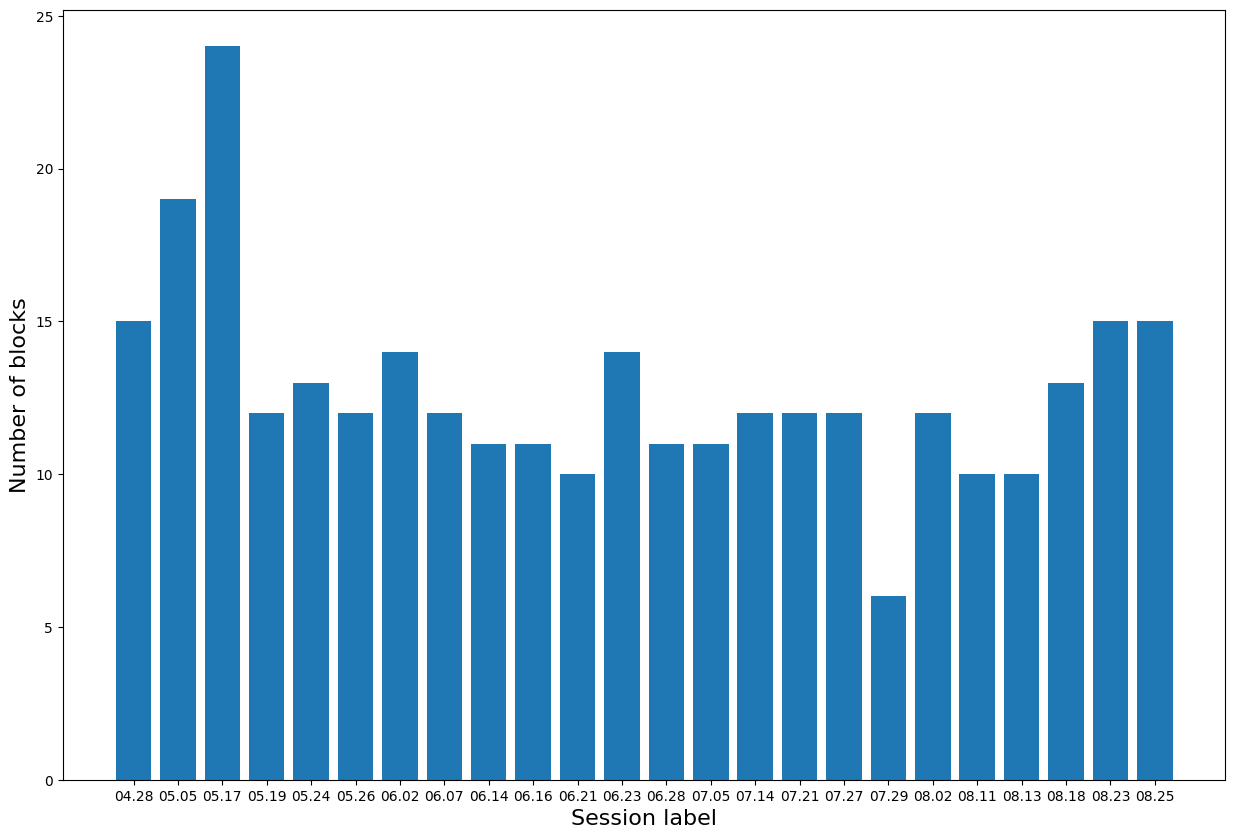

using spike pow
